In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
!pip install seaborn

In [6]:
import os

In [7]:
data = pd.read_csv('Churn_Modelling.csv')

EDA

In [8]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1, inplace=True)

In [11]:
data.Gender = [1 if each == 'Male' else 0 for each in data.Gender]

In [12]:
data.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1891,584,0,37,1,0.00,2,1,1,180363.56,0
3488,587,0,35,3,83286.56,1,1,0,125553.52,0
5958,540,0,40,3,165298.12,1,0,1,199862.75,0
7513,718,1,29,2,0.00,1,1,0,126336.72,0
7509,545,1,37,9,95829.13,2,0,1,104936.88,0


SEPARATING FEATURES AND TARGET

In [13]:
y = data.Exited.values
x_data = data.drop(['Exited'], axis=1)

In [14]:
x_data.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1966,681,0,48,8,139480.18,1,1,1,163581.67
1260,704,1,27,5,147004.34,1,1,0,64381.33
2617,692,1,45,6,152296.83,4,0,1,108040.86
8076,732,0,36,9,0.00,1,0,0,3749.00
3211,686,0,27,1,115095.88,2,0,0,78622.46


In [15]:
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data))
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.002467,0.0,0.000167,0.000008,0.000000,0.000004,0.000004,0.000004,0.403944
1,0.002423,0.0,0.000163,0.000004,0.334031,0.000004,0.000000,0.000004,0.448559
2,0.002001,0.0,0.000167,0.000032,0.636357,0.000012,0.000004,0.000000,0.454095
3,0.002786,0.0,0.000155,0.000004,0.000000,0.000008,0.000000,0.000000,0.373963
4,0.003388,0.0,0.000171,0.000008,0.500246,0.000004,0.000004,0.000004,0.315204


SPLIT TRAIN TEST

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=7)

In [17]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (9000, 9)
y_train shape:  (9000,)
x_test shape:  (1000, 9)
y_test shape:  (1000,)


In [18]:
print(x_test)

      CreditScore    Gender       Age    Tenure   Balance  NumOfProducts  \
1977     0.002858  0.000004  0.000139  0.000004  0.000000       0.000012   
3880     0.002698  0.000000  0.000287  0.000032  0.000000       0.000008   
52       0.003141  0.000000  0.000132  0.000020  0.000000       0.000008   
2551     0.002140  0.000000  0.000211  0.000012  0.000000       0.000004   
2246     0.002858  0.000000  0.000155  0.000024  0.000000       0.000008   
...           ...       ...       ...       ...       ...            ...   
15       0.002455  0.000004  0.000179  0.000012  0.570468       0.000008   
9109     0.002714  0.000004  0.000132  0.000040  0.000000       0.000004   
9128     0.002762  0.000000  0.000171  0.000004  0.485966       0.000004   
4083     0.003388  0.000000  0.000179  0.000016  0.455754       0.000008   
3747     0.002411  0.000004  0.000128  0.000036  0.000000       0.000008   

      HasCrCard  IsActiveMember  EstimatedSalary  
1977   0.000000        0.000000     

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score

# Load or prepare your dataset here
# x_train, x_test, y_train, y_test = ...

#random forest
# Defining:
rf = RandomForestClassifier(n_estimators=100, random_state=3)
# Training:
rf.fit(x_train, y_train)
# Predicting:
y_predrf = rf.predict(x_test)

#naive bayes
# Defining model:
nb = GaussianNB()
# Training the model:
nb.fit(x_train, y_train)
# Predicting:
y_prednb = nb.predict(x_test)

#knn
# Defining the model with a k number of 13:
knn = KNeighborsClassifier(n_neighbors=13)
# Training the model:
knn.fit(x_train, y_train)
# Predicting target values by using x_test and our model:
y_predknn = knn.predict(x_test)

# Evaluate models
accuracy_nb = accuracy_score(y_test, y_prednb)
accuracy_rf = accuracy_score(y_test, y_predrf)
accuracy_knn = accuracy_score(y_test, y_predknn)

print(f'Akurasi Naive Bayes: {accuracy_nb}')
print(f'Akurasi Random Forest : {accuracy_rf}')
print(f'Akurasi KNN: {accuracy_knn}')

print("Laporan Klasifikasi Naive Bayes:\n", classification_report(y_test, y_prednb))
print("Laporan Klasifikasi Random Forest:\n", classification_report(y_test, y_predrf))
print("Laporan Klasifikasi KNN:\n", classification_report(y_test, y_predknn))


Akurasi Naive Bayes: 0.793
Akurasi Random Forest : 0.861
Akurasi KNN: 0.793
Laporan Klasifikasi Naive Bayes:
               precision    recall  f1-score   support

           0       0.81      0.98      0.88       799
           1       0.41      0.06      0.11       201

    accuracy                           0.79      1000
   macro avg       0.61      0.52      0.50      1000
weighted avg       0.73      0.79      0.73      1000

Laporan Klasifikasi Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       799
           1       0.73      0.48      0.58       201

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000

Laporan Klasifikasi KNN:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88       799
           1       0.20      0.01      0.02       201

    accura

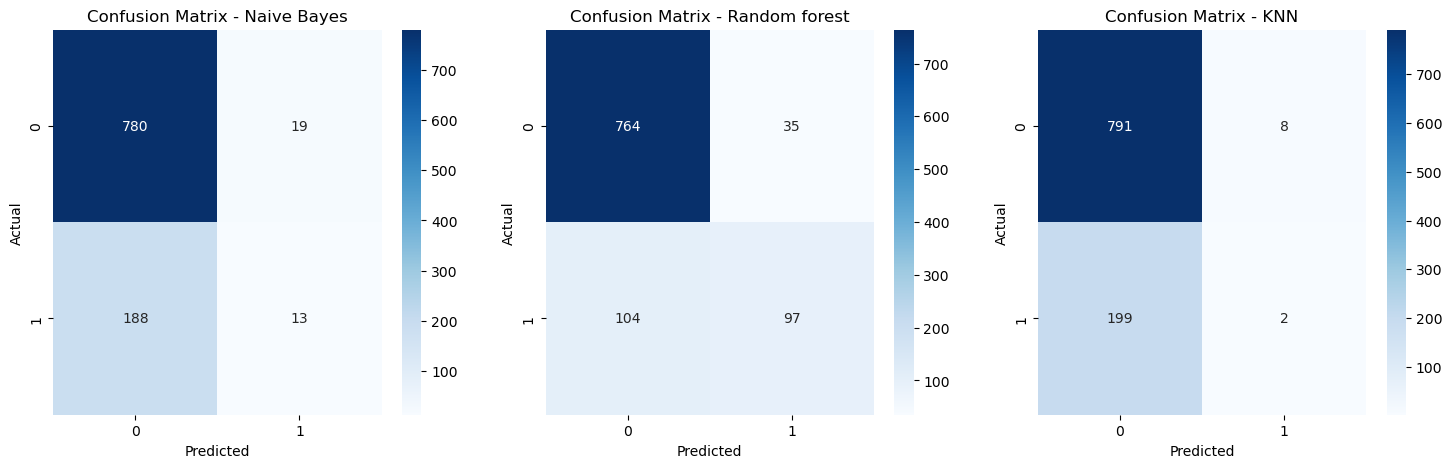

In [20]:


# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_prednb)
cm_rf = confusion_matrix(y_test, y_predrf)
cm_knn = confusion_matrix(y_test, y_predknn)

# Plot confusion matrix
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_nb, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Confusion Matrix - Naive Bayes')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Confusion Matrix - Random forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

sns.heatmap(cm_knn, annot=True, fmt='d', ax=ax[2], cmap='Blues')
ax[2].set_title('Confusion Matrix - KNN')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('Actual')

plt.show()

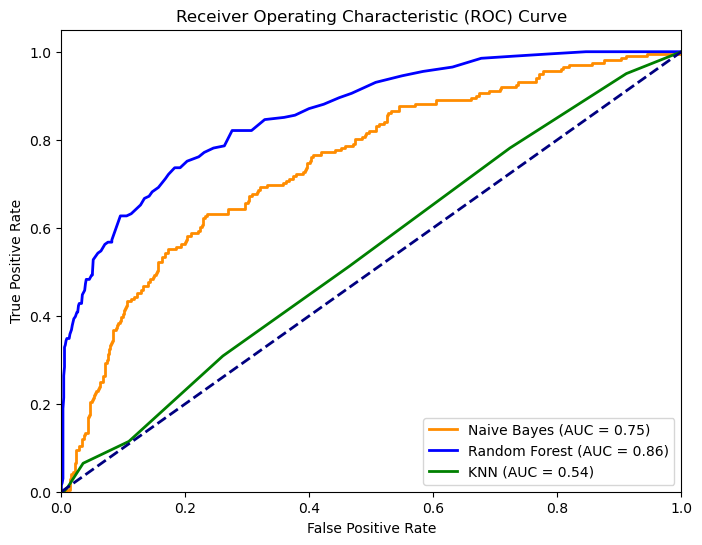

In [21]:
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb.predict_proba(x_test)[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [22]:
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.002467,0.0,0.000167,0.000008,0.000000,0.000004,0.000004,0.000004,0.403944
1,0.002423,0.0,0.000163,0.000004,0.334031,0.000004,0.000000,0.000004,0.448559
2,0.002001,0.0,0.000167,0.000032,0.636357,0.000012,0.000004,0.000000,0.454095
3,0.002786,0.0,0.000155,0.000004,0.000000,0.000008,0.000000,0.000000,0.373963
4,0.003388,0.0,0.000171,0.000008,0.500246,0.000004,0.000004,0.000004,0.315204


In [23]:
fixmodel = RandomForestClassifier(n_estimators=100, random_state=3)  # Change to SVC
fixmodel.fit(x_train, y_train)
y_predfix = fixmodel.predict(x_test)

In [24]:
import numpy as np

input_data = (712,	1,	32,	9,	100606.02,	1,	1,	0,	165693.06)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)


prediction = fixmodel.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print('Pelanggan akan tetap bertahan')
else:
    print('Pelanggan Akan keluar')

[1]
Pelanggan Akan keluar


c:\Users\rosyi\anaconda3\envs\dateng\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
import pickle

In [26]:
filename = 'pelanggan_model.sav'
pickle.dump(fixmodel,open(filename,'wb'))